In [29]:
# pip install tensorflow
import tensorflow
from tensorflow.keras.preprocessing import image
import cv2
from tensorflow.keras.applications.resnet50 import ResNet50
from PIL import Image

In [6]:
model = ResNet50(weights='imagenet',input_shape=(224,224,3))

In [8]:
# model.summary()

In [30]:
path = "goldfish.jpg"
image1 = image.load_img(path=path,target_size=(224,224,3))

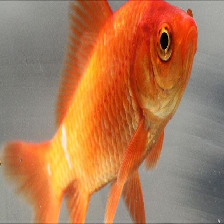

In [58]:
image1

In [32]:
x = image.img_to_array(image1)

In [34]:
x.shape

(224, 224, 3)

In [37]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [38]:
y = preprocess_input(x)

In [42]:
y.shape    #(1, 224, 224, 3)

(224, 224, 3)

In [43]:
import numpy as np 

In [44]:
z = np.expand_dims(y,axis=0)

In [45]:
z.shape

(1, 224, 224, 3)

In [46]:
prediction_probability = model.predict(z)

1/1 [==============================] - 5s 5s/step


In [48]:
prediction_probability.shape
# resnet50 model trained on imagenet, inside the imagenet, 1000 class

(1, 1000)

In [52]:
label = np.argmax(prediction_probability,axis=1)[0]
label

1

In [55]:
with open('labels.txt','r') as file:
    data = file.read().splitlines()

In [57]:
data[1]

' goldfish, Carassius auratus,'

In [ ]:
# 1. load the image from the directory
# 2. convert your images into array
# 3. process or normalize the pixel  0  - 255  __> 0  - 1

In [60]:
import os 

In [64]:
print(len(os.listdir('Data/images/cats')))

349


In [65]:
print(len(os.listdir('Data/images/dogs')))


348


In [86]:
dir_path = os.listdir('Data/images')

In [74]:
# os.listdir(os.path.join("Data/images/",'cats'))

In [79]:
dir_path

['cats', 'dogs']

In [87]:
path_dict = {'cats':[],'dogs':[]}
for dir in dir_path:
    dir_path = os.path.join("Data\images",dir)
    for image in os.listdir(dir_path):
        complete_path = os.path.join(dir_path,image)
        path_dict[dir].append(complete_path)

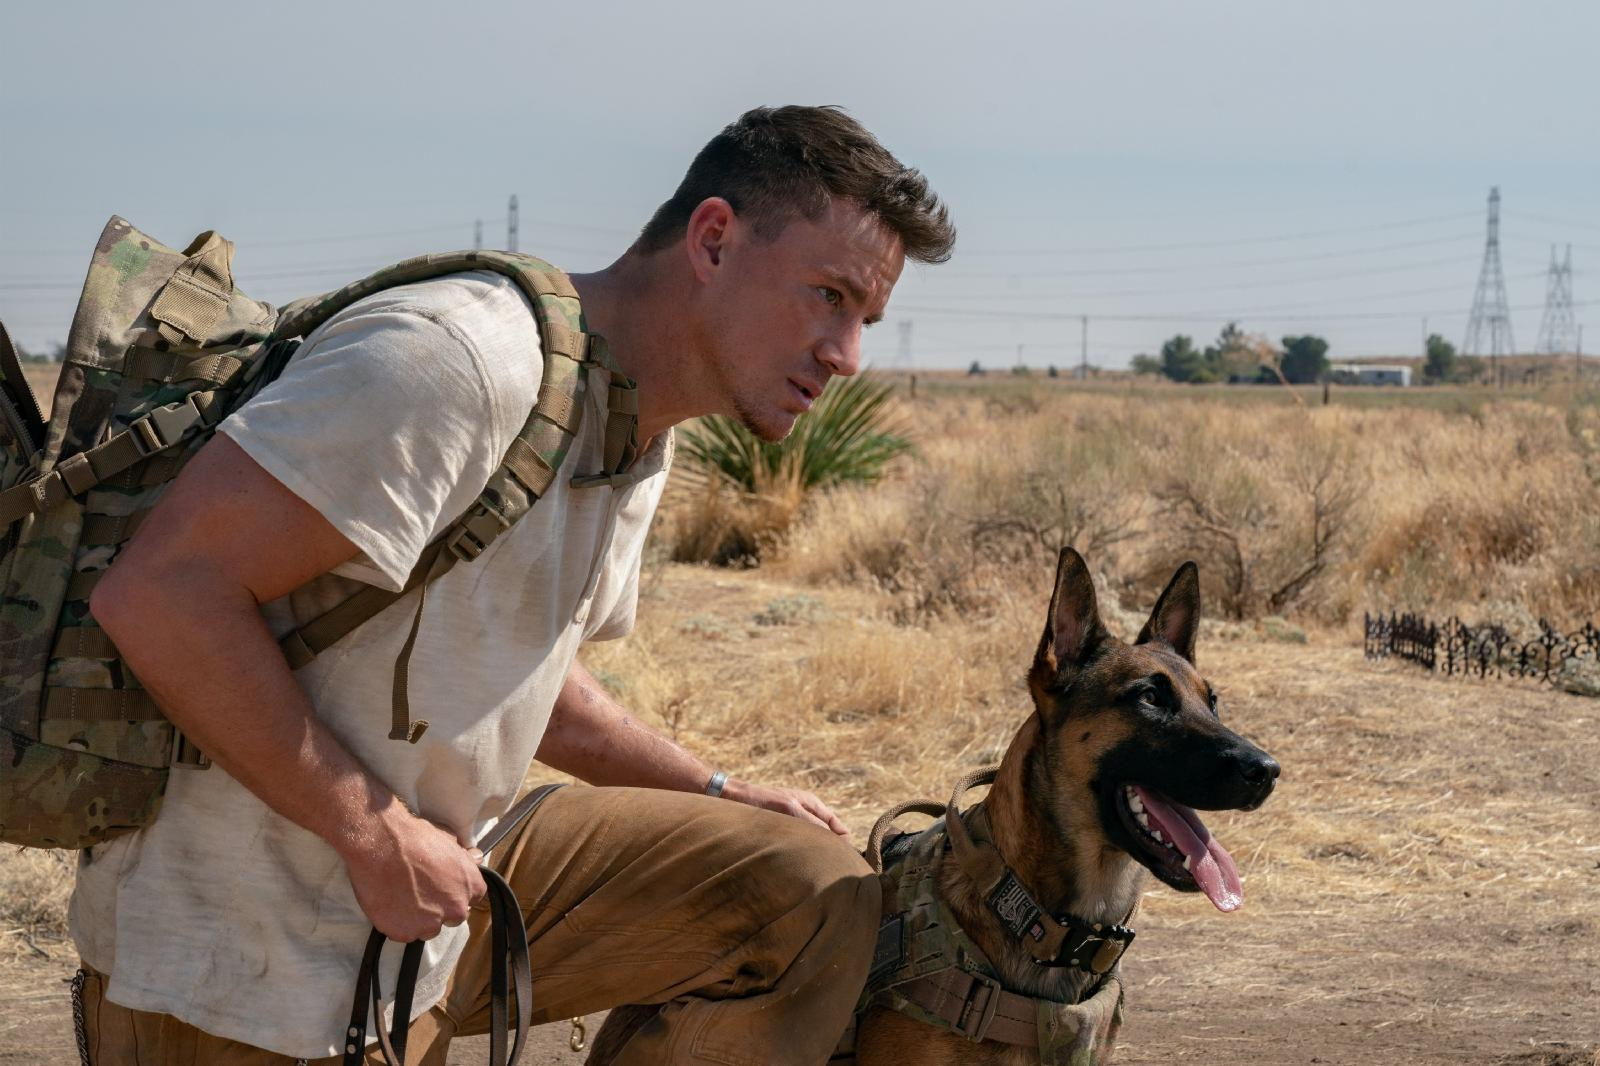

In [96]:
Image.open(path_dict['dogs'][1])

In [99]:
image_array_list = []
label = []
for key, valu in path_dict.items():
    for image_path in valu:
        image = cv2.imread(image_path)
        image_resized = cv2.resize(image,(224,224))
        image_array_list.append(image_resized)
        label.append(key)

In [101]:
image_array = np.array(image_array_list)

In [102]:
image_array.shape

(697, 224, 224, 3)

In [103]:
len(label)

697

In [108]:
labels = np.array([1 if label=='dogs' else 0 for lab in label])
# labels

In [109]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test = train_test_split(image_array,labels,test_size=0.2,random_state=42)

In [112]:
x_test.shape

(140, 224, 224, 3)

In [114]:
x_train[0]
# 0  --  255 <---  255   -->  0  1

array([[[215, 211, 207],
        [228, 225, 221],
        [222, 220, 219],
        ...,
        [230, 230, 230],
        [229, 229, 229],
        [229, 229, 229]],

       [[217, 213, 208],
        [228, 225, 221],
        [223, 221, 220],
        ...,
        [230, 230, 230],
        [229, 229, 229],
        [229, 229, 229]],

       [[219, 215, 210],
        [227, 225, 221],
        [223, 221, 220],
        ...,
        [230, 230, 230],
        [229, 229, 229],
        [229, 229, 229]],

       ...,

       [[137, 132, 129],
        [137, 132, 129],
        [137, 132, 129],
        ...,
        [178, 174, 169],
        [177, 173, 168],
        [176, 172, 167]],

       [[144, 138, 136],
        [142, 138, 134],
        [142, 136, 134],
        ...,
        [181, 177, 172],
        [180, 176, 171],
        [179, 175, 170]],

       [[147, 142, 139],
        [145, 140, 137],
        [144, 139, 136],
        ...,
        [182, 178, 173],
        [183, 179, 174],
        [182, 178, 173]]

In [115]:
x_train = x_train/255.0
x_test  = x_test/255.0

In [ ]:
# we loaded data
# converted into array 


In [116]:
model = ResNet50(weights='imagenet',input_shape=(224,224,3),include_top=False)

In [117]:
for layer in model.layers:
    layer.trainable = False

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [121]:
#### we are defining our model utilizing the power of
#  pretraining

# image = ---> resnet50  -->  Flatten   --> hidden layers

custome_model = Sequential([model,
Flatten(),
Dense(units=64,activation='relu'),
Dense(units=48,activation='relu'),    # hidden layers of ann
Dense(units=1,activation='sigmoid')])  # output 

In [122]:
custome_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [123]:
custome_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 30013473 (114.49 MB)
Trainable params: 6425761 (24.51 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [127]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
1. loaded 
2. converted array 
3. normalize the pixel    0  -  1 
4. divided training testing
5. defined our custome model with resnet50

In [128]:
history = custome_model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5


18/18 [==============================] - 158s 8s/step - loss: 0.1830 - accuracy: 0.9425 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
18/18 [==============================] - 134s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
18/18 [==============================] - 142s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
18/18 [==============================] - 128s 7s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
18/18 [==============================] - 141s 8s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [129]:
prediction = custome_model.predict(x_test)

5/5 [==============================] - 31s 5s/step


In [130]:
custome_model.evaluate(x_train,y_train)
# accuracy of our model on training set 
# custome_model.evaluate(x_test,y_test)


18/18 [==============================] - 115s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [133]:
prediction = (prediction>0.5).astype(int).ravel()
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [134]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [135]:
import pandas as pd 

<Axes: >

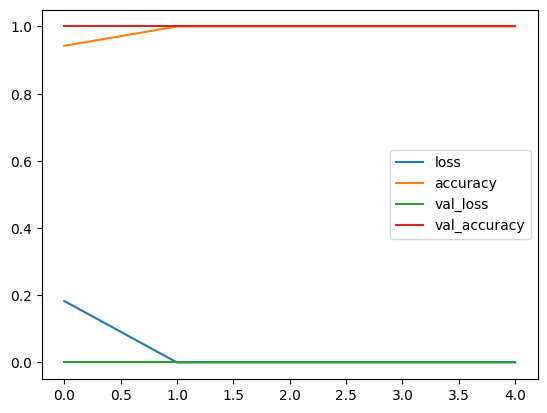

In [137]:
pd.DataFrame(history.history).plot()